In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

## pandas 

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [33]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [34]:
# get rid of the missing values in bill_depth, 
# get rid of row 3 
penguins_df.drop(4)
# convert body mass in grams to body mass in kilo grams   conversion ~ 0.001 
penguins_df['body_mass_g'] = (penguins_df['body_mass_g'] * .001)

# rename the body mass column 
penguins_df.rename(columns={'body_mass_g': 'body_mass_kg'}, inplace=True)


# look at the distribution of bill length 
penguins_df.describe()

# sns.histplot(x = 'bill_length_mm', hue = 'island', data = penguins_df)

# look at the differences in the distribution of bill length between islands 
# calculate the mean of bill lenth
mean_bill_lenth = penguins_df['bill_length_mm'].mean()

# create a new column called big billed if the penguin has a bill greater than the median 
# penguins_df['big_billed'] = penguins_df['bill_length_mm'] > mean_bill_lenth

penguins_df['big_billed'] = penguins_df['bill_length_mm'].map(lambda x: 'big' if x > mean_bill_lenth else 'small')

In [32]:
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg,sex,big_billed
0,Adelie,Torgersen,39.1,18.7,181.0,0.00375,Male,small
1,Adelie,Torgersen,39.5,17.4,186.0,0.00380,Female,small
2,Adelie,Torgersen,40.3,18.0,195.0,0.00325,Female,small
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,small
4,Adelie,Torgersen,36.7,19.3,193.0,0.00345,Female,small
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,small
340,Gentoo,Biscoe,46.8,14.3,215.0,0.00485,Female,big
341,Gentoo,Biscoe,50.4,15.7,222.0,0.00575,Male,big
342,Gentoo,Biscoe,45.2,14.8,212.0,0.00520,Female,big


In [37]:
glue_df = sns.load_dataset('glue')
glue_df

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [41]:
average_score_year = glue_df.groupby('Year').mean()
average_score_year

/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_63992/2295478198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_score_year = glue_df.groupby('Year').mean()


,Score
Year,
2017,63.26250
2018,74.46875
2019,88.63750


/var/folders/wf/s7j2jn9j1ns035j4rx9g3rzr0000gn/T/ipykernel_63992/326537886.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_score_year = glue_df.groupby('Year').mean().plot(kind='bar')


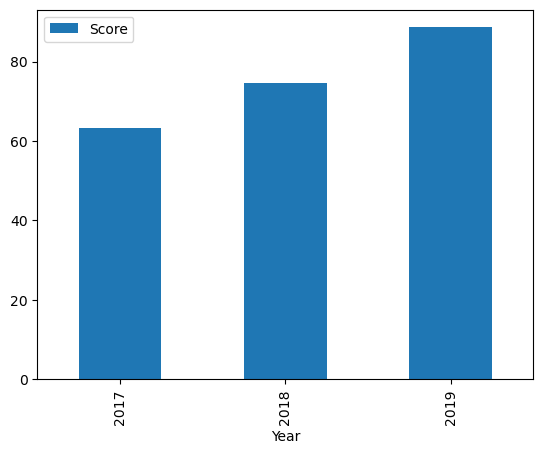

In [43]:
# plot a bar graph with matplotlib and seaborn of the average score per year 
average_score_year = glue_df.groupby('Year').mean().plot(kind='bar')
# add titles and axis 

# find the model with the lowest score
# find the most occuring model in the data set 


In [51]:
lowest_score = glue_df.sort_values(by ='Score', ascending = True).head(1)
lowest_score

,Model,Year,Encoder,Task,Score
7,BiLSTM,2017,LSTM,CoLA,11.6


In [55]:
most_frequent = glue_df['Model'].value_counts()
most_frequent

ERNIE          8
T5             8
RoBERTa        8
BERT           8
BiLSTM+ELMo    8
BiLSTM+CoVe    8
BiLSTM+Attn    8
BiLSTM         8
Name: Model, dtype: int64

In [ ]:
sns.barplot(x = average_score_year)

In [ ]:
# alternate option
sns.barplot(x='Year', y='Score', data=glue_df)


In [59]:
iris_df = sns.load_dataset('iris')

In [63]:
# find the virginica flower with the largest sepal width 
largest_sepal_width = iris_df.groupby('species')['sepal_width'].max()
largest_sepal_width

species
setosa        4.4
versicolor    3.4
virginica     3.8
Name: sepal_width, dtype: float64

In [64]:
iris_df.loc[iris_df['species'] == 'virginica'].sort_values(by='sepal_width', ascending=False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [ ]:
# virginica_df = iris_df[iris_df['species'] == 'virginica']

# virginica_df = 

In [65]:
iris_df[iris_df['species'] == 'virginica'].sort_values(by='sepal_width', ascending=False).head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [69]:
cars_dict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

# convert the keys in this dictionary to a list
cars = list(cars_dict.keys())

In [70]:
info = list(cars_dict.values())
info

['Ford', 'Mustang', 1964]

In [72]:
list(zip(info, cars))

[('Ford', 'brand'), ('Mustang', 'model'), (1964, 'year')]

## JSONS 

In [6]:



data =[ 
   { 
      "id":1,
      "name":"cridmas",
      "color":[ 
         "red",
         "green"
      ]
   },
   { 
      "id":2,
      "name":"Rocco",
      "color":[ 
         "pink",
         "yellow"
      ]
   }
]

In [7]:
# create a list of all the values in this dictionary 
values_list = []
for x in data:
    values_list.append(x.values())
print(values_list)

[dict_values([1, 'cridmas', ['red', 'green']]), dict_values([2, 'Rocco', ['pink', 'yellow']])]


In [8]:
[data[0]['color'][1],data[1]['color']][1]

['pink', 'yellow']

In [9]:
for dic in data:
    dic['color'][0] = 'red'

print(data)

[{'id': 1, 'name': 'cridmas', 'color': ['red', 'green']}, {'id': 2, 'name': 'Rocco', 'color': ['red', 'yellow']}]


In [11]:
for dic in data[0:]:
    dic['color'] = 'yellow'
    dic['color'] = 'yellow'
print(data)

[{'id': 1, 'name': 'cridmas', 'color': 'yellow'}, {'id': 2, 'name': 'Rocco', 'color': 'yellow'}]


In [111]:
# list both names
[data[0]['name'],data[1]['name']]

['cridmas', 'Rocco']

In [112]:
# or
tuple([data[0]['name'], data[1]['name']])

('cridmas', 'Rocco')

In [115]:
import json

sampleJson = """{ 
   "company":{ 
      "employee":{ 
         "name":"emma",
         "payble":{ 
            "salary":7000,
            "bonus":800
         }
      }
   }
}"""

data = json.loads(sampleJson)

In [117]:
data

{'company': {'employee': {'name': 'emma',
   'payble': {'salary': 7000, 'bonus': 800}}}}

In [120]:
# get me the name emma from the json
name = data['company']['employee']['name']
name

'emma'

In [123]:
# get emma salary and assign it to a variable 
salary = data['company']['employee']['payble']['salary']
salary

7000

In [127]:
# add emmas salary and bonus together + add in key-value pair
data['company']['employee']['payble']['combined'] = data['company']['employee']['payble']['salary'] + data['company']['employee']['payble']['bonus']
data

{'company': {'employee': {'name': 'emma',
   'payble': {'salary': 7000, 'bonus': 800, 'combined': 7800}}}}

In [ ]:
(data['company']['employee']['payble']['salary'])

In [16]:
data = [{"code":"Company1","exchange_short_name":"ST","date":"2000-01-01"},
{"code":"Company2","exchange_short_name":"ST","date":"2000-01-01"}]

In [18]:
# print the date from each dictionary in a loop 

for dictionary in data:
    print(dictionary['date'])

2000-01-01
2000-01-01


In [128]:
data2={
    "updated": "2020-07-09",
    "versions": [
        {
            "family": "macOS",
            "version": "10.14",
            "codename": "Mojave",
            "announced":"2018-06-04",
            "released": "2018-09-24",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "2 GB of memory",
                "12.5 - 18.5 GB of available avaialable disk space",
                "OS X 10.8 or later"
            ],
            "releases": [
                {
                    "version": "10.14",
                    "build": "18A391",
                    "darwin": "18.0.0",
                    "released": "2018-09-24"
                },
                {
                    "version": "10.14.1",
                    "build": "18B75",
                    "darwin": "18.2.0",
                    "released": "2018-10-30"
                },
                {
                    "version": "10.14.2",
                    "build": "18C54",
                    "darwin": "18.2.0",
                    "released": "2018-12-05"
                },
                {
                    "version": "10.14.3",
                    "build": "18D42",
                    "darwin": "18.2.0",
                    "released": "2019-01-22"
                },
                {
                    "version": "10.14.4",
                    "build": "18E226",
                    "darwin": "18.5.0",
                    "released": "2019-03-25"
                },
                {
                    "version": "10.14.5",
                    "build": "18F132",
                    "darwin": "18.6.0",
                    "released": "2019-05-13"
                },
                {
                    "version": "10.14.6",
                    "build": "18G84",
                    "darwin": "18.7.0",
                    "released": "2019-07-22"
                }
            ]
        },
        {
            "family": "macOS",
            "version": "10.15",
            "codename": "Catalina",
            "announced":"2019-06-03",
            "released": "2019-10-07",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "4 GB of memory",
                "12.5 GB of available avaialable disk space",
                "OS X 10.11.5 or later"
            ],
            "releases": [
                {
                    "version": "10.15",
                    "build": "19A583",
                    "darwin": "19.0.0",
                    "released": "2019-10-07"
                },
                {
                    "version": "10.15.1",
                    "build": "19B88",
                    "darwin": "19.0.0",
                    "released": "2019-10-29"
                },
                {
                    "version": "10.15.2",
                    "build": "19C57",
                    "darwin": "19.2.0",
                    "released": "2019-12-10"
                },
                {
                    "version": "10.15.3",
                    "build": "19D76",
                    "darwin": "19.3.0",
                    "released": "2020-01-28"
                },
                {
                    "version": "10.15.4",
                    "build": "19E266",
                    "darwin": "19.4.0",
                    "released": "2020-03-24"
                },
                {
                    "version": "10.15.5",
                    "build": "19F96",
                    "darwin": "19.5.0",
                    "released": "2020-05-26"
                }
            ]
        }
    ]
}

In [ ]:
darwins_list =[]


In [132]:
data2['version'][0]['release'][0]['darwin']

KeyError: 'version'

In [24]:
for _version in data2["versions"]: 
    print(_version["codename"])
    for _requirement in _version["requirements"]: 
        print("  " + _requirement)

Mojave
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  2 GB of memory
  12.5 - 18.5 GB of available avaialable disk space
  OS X 10.8 or later
Catalina
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  4 GB of memory
  12.5 GB of available avaialable disk space
  OS X 10.11.5 or later
